Predicting Tumour Size with Regression 

In [1]:
# Libraries 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf
from pandas import read_csv 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 

In [2]:
# Importing Dataset and extracting the independent and dependent variables 
tumour = pd.read_csv('C:/Users/marcv/Downloads/regression.csv')

#Splitting the data set
X = tumour.iloc[:, :-1].values
y = tumour.iloc[:, 9].values 
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [3]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regression using Neural Networks

In [4]:
# Defining the model 
model = Sequential()
model.add(Dense(128, input_dim = 9, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

# Output Layer
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
183/183 [==============================] - 1s 2ms/step - loss: 43.2428 - mae: 4.9903 - val_loss: 29.2840 - val_mae: 4.3753
Epoch 2/100
183/183 [==============================] - 1s 4ms/step - loss: 26.6628 - mae: 4.2248 - val_loss: 26.4108 - val_mae: 4.1097
Epoch 3/100
183/183 [==============================] - 1s 4ms/step - loss: 25.0505 - mae: 4.0809 - val_loss: 24.6532 - val_mae: 4.0365
Epoch 4/100
183/183 [==============================] - 1s 4ms/step - loss: 24.4620 - mae: 4.0249 - val_loss: 24.4474 - val_mae: 3.9325
Epoch 5/100
183/183 [==============================] - 1s 4ms/step - loss: 24.0133 - mae: 3.9607 - val_loss: 23.9534 - val_mae: 3.8843
Epoch 6/100
183/183 [==============================] - 1s 4ms/step - loss: 23.6203 - mae: 3.9194 - val_loss: 23.6875 - val_mae: 3.8953
Epoch 7/100
183/183 [==============================] - 1s 4ms/step - loss: 23.4369 - mae: 3.8972 - val_loss: 24.0108 - val_mae: 3.8895
Epoch 8/100
183/183 [==============================] - 

183/183 [==============================] - 1s 4ms/step - loss: 17.4317 - mae: 3.2351 - val_loss: 19.4848 - val_mae: 3.3714
Epoch 62/100
183/183 [==============================] - 1s 3ms/step - loss: 17.5443 - mae: 3.2410 - val_loss: 19.2590 - val_mae: 3.3605
Epoch 63/100
183/183 [==============================] - 0s 1ms/step - loss: 17.1569 - mae: 3.2069 - val_loss: 19.2041 - val_mae: 3.3421
Epoch 64/100
183/183 [==============================] - 0s 1ms/step - loss: 17.2152 - mae: 3.2128 - val_loss: 19.2700 - val_mae: 3.4073
Epoch 65/100
183/183 [==============================] - 0s 2ms/step - loss: 17.3551 - mae: 3.2288 - val_loss: 19.4529 - val_mae: 3.3456
Epoch 66/100
183/183 [==============================] - 0s 1ms/step - loss: 17.0684 - mae: 3.1901 - val_loss: 19.1519 - val_mae: 3.3984
Epoch 67/100
183/183 [==============================] - 0s 1ms/step - loss: 17.0900 - mae: 3.2012 - val_loss: 19.4260 - val_mae: 3.4419
Epoch 68/100
183/183 [==============================] - 0s 1m

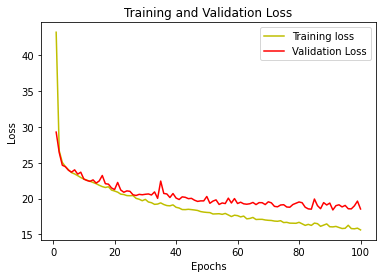

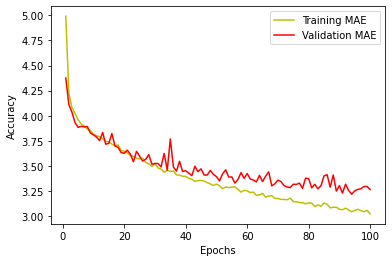

In [6]:
#Plotting loss and validation loss
from matplotlib import pyplot as plt 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label = 'Training MAE')
plt.plot(epochs, val_acc, 'r', label = 'Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
#Predict on test data 
predictions = model.predict(X_test_scaled)
print("Predicted values are: ", predictions)
print("Real values are: ", y_test)

Predicted values are:  [[7.939038 ]
 [5.405216 ]
 [7.367555 ]
 ...
 [5.3428907]
 [1.6583176]
 [2.406139 ]]
Real values are:  [ 1.95   1.715 14.726 ... 15.887  2.     2.383]


In [8]:
# Mean Square Error and Mean absolute Error 
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print("Mean squared error from neural net: ", mse_neural)
print("Mean absolute error from neural net: ", mae_neural)

58/58 [==============================] - 0s 842us/step - loss: 19.8720 - mae: 3.3877
Mean squared error from neural net:  19.872024536132812
Mean absolute error from neural net:  3.387695074081421


Regression using Multiple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred_mlr = regressor.predict(X_test_scaled)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
print("Mean squared error from multiple linear regression: ", mse_mlr)
print("Mean absolute error from multiple linear regression: ", mae_mlr )

Mean squared error from multiple linear regression:  27.597227106999483
Mean absolute error from multiple linear regression:  4.371652436946849


Random Forest Regression 

In [10]:
from sklearn.ensemble import RandomForestRegressor 
model_rf = RandomForestRegressor(n_estimators = 30, random_state = 30)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean squared error from Random Forest: ", mse_rf)
print("Mean absolute error from Random Forest: ", mae_rf)


Mean squared error from Random Forest:  17.846232797436397
Mean absolute error from Random Forest:  3.039468806921676
